# Analytics
El objetivo de este notebook es explorar los datos, también usar analisis estadistico y visualizaciones para comprenderlos mejor.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium
from scipy import stats
import plotly.express as px

In [2]:
world_geo = r'world_countries.json'
df15=pd.read_csv('./data/2015.csv', index_col=0)
df16=pd.read_csv('./data/2016.csv', index_col=0)
df17=pd.read_csv('./data/2017.csv', index_col=0)
df18=pd.read_csv('./data/2018.csv', index_col=0)
df19=pd.read_csv('./data/2019.csv', index_col=0)
df20=pd.read_csv('./data/2020.csv', index_col=0)
df_list=[df15, df16, df17, df18, df19, df20]

In [3]:
df17.corr().iloc[:,6] #Esta es la correlacion entre el score y cada columna de datos
#Donde se observa la mayor correlacion de la felicidad es con la economia

Economy       0.812469
Healthy       0.781951
Social        0.752737
Freedom       0.570137
Corruption    0.429080
Generosity    0.155256
Score         1.000000
Name: Score, dtype: float64

In [4]:
sns.set(rc={'figure.figsize':(13,7)})
sns.set_palette('PuBuGn_r') ##ocean PuBuGn_r

Text(0.5, 1.0, 'El Score de felicidad en función a GPD per Capita del año 2017')

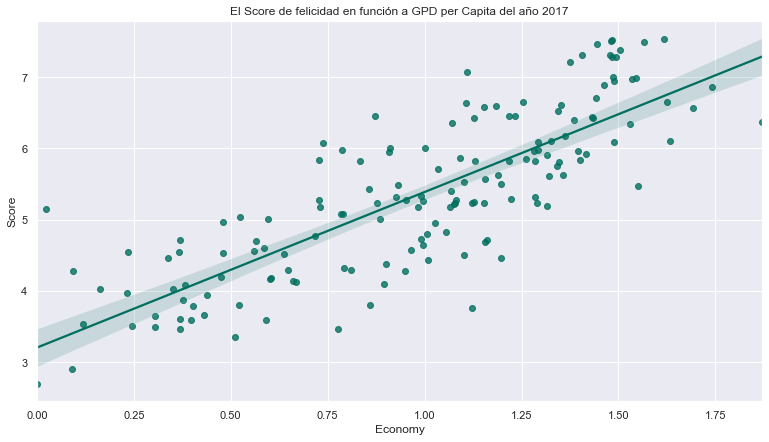

In [5]:
#plt.figure(figsize=(13,7))
sns.regplot(x='Economy', y='Score', data=df17)
plt.title('El Score de felicidad en función a GPD per Capita del año 2017')


Text(0.5, 1.0, 'Histograma del Score de felicidad del año 2017')

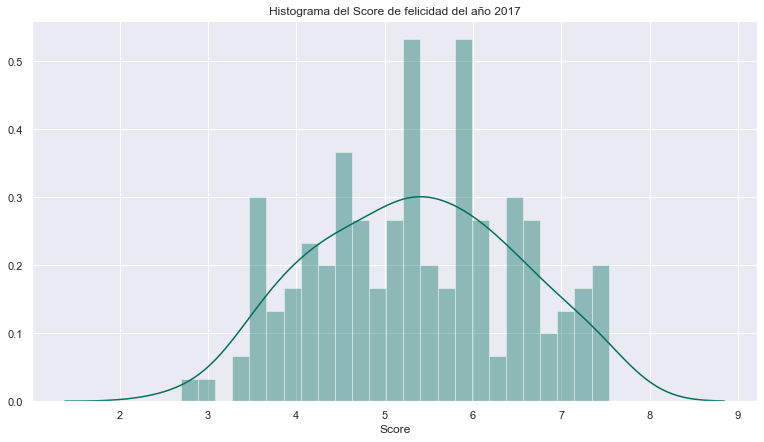

In [6]:
sns.distplot(df17['Score'], kde=True, bins=25)
plt.title('Histograma del Score de felicidad del año 2017')

Text(0.5, 1.0, 'Histograma del Score de felicidad de todos los años')

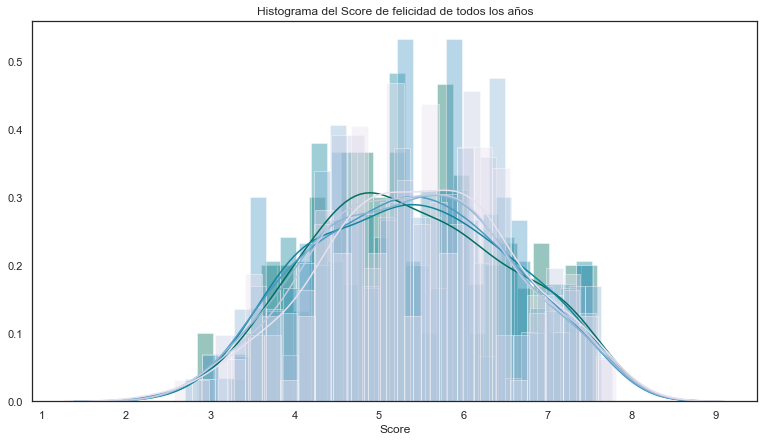

In [7]:
with sns.axes_style('white'): #sns.set_palette('PuBuGn_r')
    sns.distplot(df15['Score'], kde=True, bins=25)
    sns.distplot(df16['Score'], kde=True, bins=25)
    sns.distplot(df17['Score'], kde=True, bins=25)
    sns.distplot(df18['Score'], kde=True, bins=25)
    sns.distplot(df19['Score'], kde=True, bins=25)
    sns.distplot(df20['Score'], kde=True, bins=25)
plt.title('Histograma del Score de felicidad de todos los años')

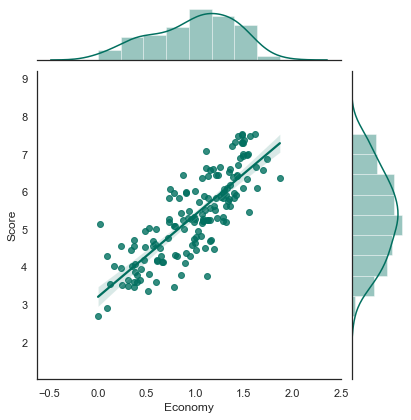

In [8]:
with sns.axes_style('white'):
    sns.jointplot("Economy", "Score", data=df17, kind='reg')

In [9]:
###Choroplth 2015
 # geojson file
##Aqui use un json ya con paises pero configure para que el nombre se ajuste a los nombres de mis datos
world_geo = r'world_countries.json'
map15 = folium.Map()
map15.choropleth(
    geo_data=world_geo,
    data=df15,
    columns=['Country', 'Score'],
    key_on='feature.properties.name',
    fill_color='YlGn_r', 
    #qcolor_continuous_scale=px.colors.sequential.Greens,
    fill_opacity=0.5, 
    line_opacity=0.4,
    legend_name='Score mundial de felicidad del año 2015'
)
#m.save('#292_folium_chloropleth_USA1.html')


# display map
map15

### Acontinuación voy a estudiar el comportamiento de los datos en el tiempo. 

In [10]:
#Voy a recopilar los primeros 10 paises de cada año con mayor felicidad
countries_top=[]
for i in range(len(df_list)):
    for k in range(10):
        countries_top.append((df_list[i].iloc[k,0]))


# list(df_list[0].iloc[:,0].head())

In [11]:
countries_top=list(set(countries_top))
print(countries_top) #Vemos que hay 12 paises que estuvieron en el top 10 de felicidad en algun año entre el 2015 y 2020
print(len(countries_top), "son los paises que algun año estuvieron en el top 10 de felicidad")

['Canada', 'Luxembourg', 'New Zealand', 'Finland', 'Iceland', 'Austria', 'Sweden', 'Switzerland', 'Denmark', 'Netherlands', 'Norway', 'Australia']
12 son los paises que algun año estuvieron en el top 10 de felicidad


In [12]:
## Esto es solo un ejemplo de como implementare esta logica con for loop
float(df17[df17['Country']==countries_top[2]].loc[:,'Score'])
print(countries_top[2])

New Zealand


In [13]:
df_score_top=pd.DataFrame()
df_score_top['Country']=countries_top
for i in range(len(df_list)):
    valores_lista=[]
    for j in range(len(countries_top)):
        valor_score=float(df_list[i][df_list[i]['Country']==countries_top[j]].loc[:,'Score'])
        valores_lista.append(valor_score)
    año=i+2015
    df_score_top[año]=valores_lista

In [14]:
df_score_top
#Incluire una ultima columna que nos diga el promedio del score en estos ultimos años. 
##averages=[]
#for i in range(len(countries_top)):
    #avg_val=df_score_top.iloc[i,1:].mean()
   # averages.append(avg_val)
#df_score_top['Average_score']=averages


#df_score_top.sort_values('Average_score', ascending=False) #ordeno los valores en función al promedio de score
#d######f_score_top.set_index('Country') #Defino el pais como index

,Country,2015,2016,2017,2018,2019,2020
0,Canada,7.427,7.404,7.316,7.328,7.278,7.2321
1,Luxembourg,6.946,6.871,6.863,6.910,7.090,7.2375
2,New Zealand,7.286,7.334,7.314,7.324,7.307,7.2996
3,Finland,7.406,7.413,7.469,7.632,7.769,7.8087
4,Iceland,7.561,7.501,7.504,7.495,7.494,7.5045
5,Austria,7.200,7.119,7.006,7.139,7.246,7.2942
6,Sweden,7.364,7.291,7.284,7.314,7.343,7.3535
7,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5599
8,Denmark,7.527,7.526,7.522,7.555,7.600,7.6456
9,Netherlands,7.378,7.339,7.377,7.441,7.488,7.4489


In [15]:
df_t=df_score_top.transpose()
df_t
headers = df_t.iloc[0]
df_t  = pd.DataFrame(df_t.values[1:], columns=headers)
years=[2015, 2016,2017,2018, 2019, 2020]
df_t['Year']=years
df_t.set_index('Year', inplace=True)
df_t

Country,Canada,Luxembourg,New Zealand,Finland,Iceland,Austria,Sweden,Switzerland,Denmark,Netherlands,Norway,Australia
Year,,,,,,,,,,,,
2015,7.427,6.946,7.286,7.406,7.561,7.2,7.364,7.587,7.527,7.378,7.522,7.284
2016,7.404,6.871,7.334,7.413,7.501,7.119,7.291,7.509,7.526,7.339,7.498,7.313
2017,7.316,6.863,7.314,7.469,7.504,7.006,7.284,7.494,7.522,7.377,7.537,7.284
2018,7.328,6.91,7.324,7.632,7.495,7.139,7.314,7.487,7.555,7.441,7.594,7.272
2019,7.278,7.09,7.307,7.769,7.494,7.246,7.343,7.48,7.6,7.488,7.554,7.228
2020,7.2321,7.2375,7.2996,7.8087,7.5045,7.2942,7.3535,7.5599,7.6456,7.4489,7.488,7.2228


In [16]:
df_t=df_score_top.transpose()
df_t
headers = df_t.iloc[0]
df_t  = pd.DataFrame(df_t.values[1:], columns=headers)
years=[2015, 2016,2017,2018, 2019, 2020]
df_t['Year']=years
df_t.set_index('Year', inplace=True)
df_t

Country,Canada,Luxembourg,New Zealand,Finland,Iceland,Austria,Sweden,Switzerland,Denmark,Netherlands,Norway,Australia
Year,,,,,,,,,,,,
2015,7.427,6.946,7.286,7.406,7.561,7.2,7.364,7.587,7.527,7.378,7.522,7.284
2016,7.404,6.871,7.334,7.413,7.501,7.119,7.291,7.509,7.526,7.339,7.498,7.313
2017,7.316,6.863,7.314,7.469,7.504,7.006,7.284,7.494,7.522,7.377,7.537,7.284
2018,7.328,6.91,7.324,7.632,7.495,7.139,7.314,7.487,7.555,7.441,7.594,7.272
2019,7.278,7.09,7.307,7.769,7.494,7.246,7.343,7.48,7.6,7.488,7.554,7.228
2020,7.2321,7.2375,7.2996,7.8087,7.5045,7.2942,7.3535,7.5599,7.6456,7.4489,7.488,7.2228


Text(0.5, 1.0, 'Paises que estuvieron en el top 10 de felicidad entre el 2015 y 2020')

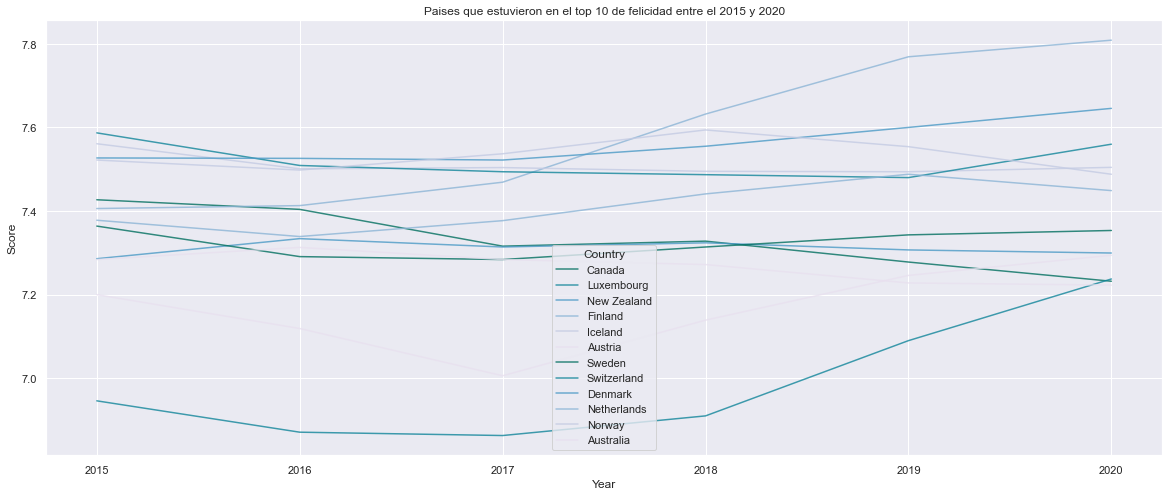

In [17]:
df_t.index = df_t.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_t.plot(kind='line', stacked=False, alpha= 0.8, figsize=(20, 8))
plt.ylabel('Score')
plt.title('Paises que estuvieron en el top 10 de felicidad entre el 2015 y 2020')

In [18]:
## Los datos de todos los años como un todo
##Este analisis tiene sentido para comprender los datos a nivel mundial en promedio de estos años, 
#pero también tiene sentido porque para usar ML voy a utilizar todos los datos como un todo.

### Los datos de todos los años como un solo data set

<AxesSubplot:xlabel='Economy', ylabel='Score'>

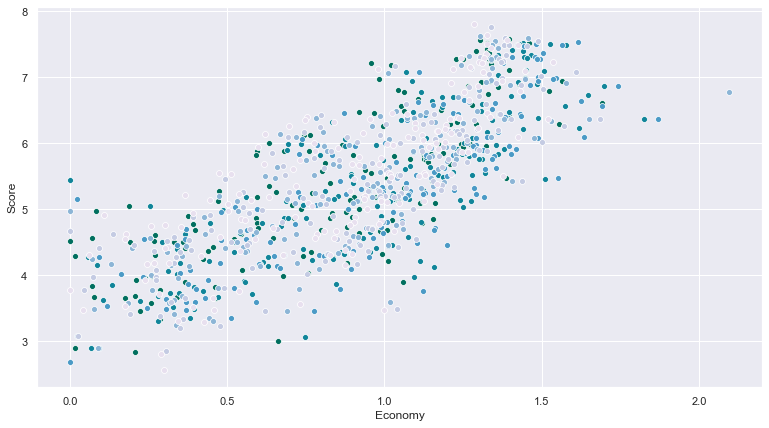

In [19]:
sns.scatterplot(data=df15, x='Economy', y='Score')
sns.scatterplot(data=df16, x='Economy', y='Score')
sns.scatterplot(data=df17, x='Economy', y='Score')
sns.scatterplot(data=df18, x='Economy', y='Score')
sns.scatterplot(data=df19, x='Economy', y='Score')
sns.scatterplot(data=df20, x='Economy', y='Score')

In [20]:
DF=df15.merge(df16, how='outer')  
DF=DF.merge(df17, how='outer')  
DF=DF.merge(df18, how='outer')
DF=DF.merge(df19, how='outer')  
DF=DF.merge(df20, how='outer')    

DF.sort_values('Score', ascending=False, inplace=True)
DF.to_csv(f'./data/all_data_in_one.csv')

In [21]:
DF.describe()

,Economy,Healthy,Social,Freedom,Corruption,Generosity,Score
count,935.000000,935.000000,935.000000,935.000000,934.000000,935.000000,935.000000
mean,0.908311,0.625581,1.091028,0.419680,0.126301,0.213797,5.394436
std,0.402023,0.250900,0.324069,0.152199,0.106998,0.119452,1.124935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.566900
25%,0.600264,0.449596,0.879945,0.317835,0.054545,0.127030,4.540000
50%,0.974380,0.667465,1.143945,0.436000,0.092655,0.199358,5.353500
75%,1.228785,0.814710,1.347408,0.539885,0.157865,0.271398,6.198500
max,2.096000,1.141000,1.644000,0.724000,0.551910,0.838075,7.808700


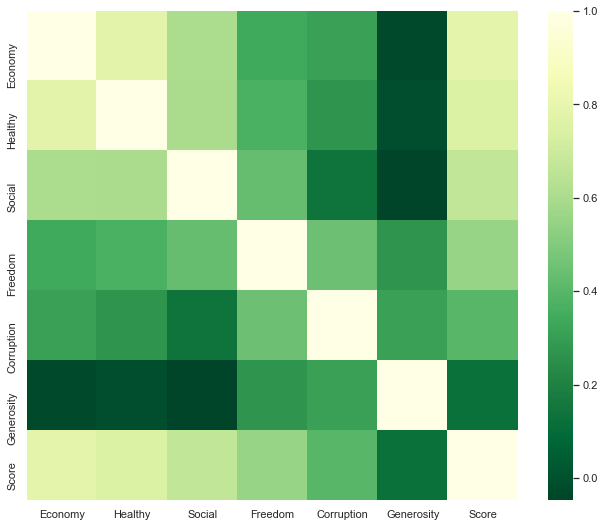

In [22]:
DF_corr=DF.corr() #Para el mapa de correlaciones
DF_corr

def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(11, 9))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = False 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap="YlGn_r", ax=ax)    #cmap="YlGn"  "YlGnBu"

heat_map(DF_corr)

In [23]:
import plotly.express as px
import plotly
fig = px.scatter_3d(DF, x='Economy', y='Healthy', z='Social',
                    color='Score', size='Freedom', hover_name='Country', color_continuous_scale=px.colors.sequential.Viridis, #color_continuous_scale=px.colors.sequential.Viridis #RdBu #PuBuGn_r #Blues #YlGn_r
                    width=1100, height=600)
scene = dict(
                    xaxis = dict(
                         backgroundcolor="White",  #backgroundcolor="rgb(200, 200, 230)"
                         gridcolor="black",
                         showbackground=True,
                         zerolinecolor="black",),
                    yaxis = dict(
                        backgroundcolor="White", #"rgb(230, 200,230)"
                        gridcolor="black",
                        showbackground=True,
                        zerolinecolor="black"),
                    zaxis = dict(
                        backgroundcolor="White",#rgb(230, 230,200)
                        gridcolor="black",
                        showbackground=True,
                        zerolinecolor="black"))
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), scene=scene,paper_bgcolor="black")
plotly.offline.plot(fig, filename = 'exploration.html', auto_open=False)
with open('plotly_graph.html', 'w') as f:
    f.write(fig.to_html(include_plotlyjs='cdn'))
fig.show()


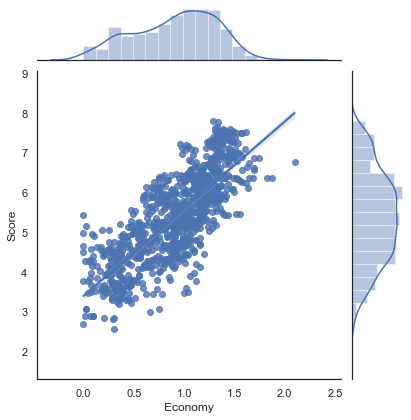

In [24]:
with sns.axes_style('white'):
    sns.jointplot("Economy", "Score", data=DF, kind='reg')

Text(0.5, 1.0, 'Histograma del Score de felicidad acumulado en los años 2015 hasta 2020')

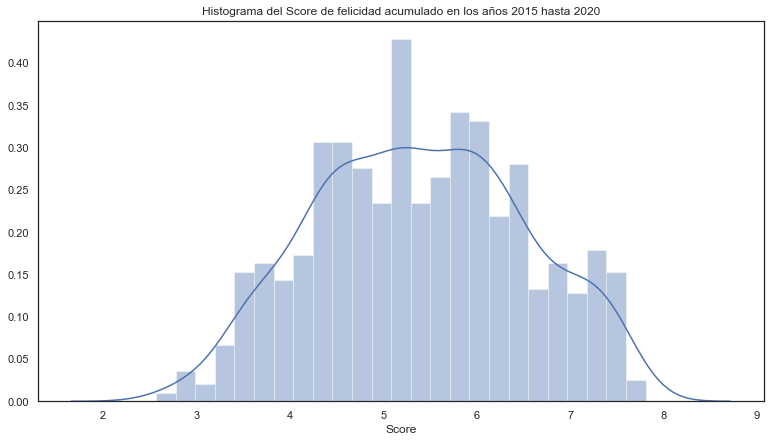

In [25]:
##Obs en realidad tendria que obenter el promedio
sns.distplot(DF['Score'], kde=True, bins=25)
plt.title('Histograma del Score de felicidad acumulado en los años 2015 hasta 2020')

In [26]:
#De esta manera agrego los años a cada DF_score
###Esto funciona! Pero creo que voy a cambiar el nombre DF_scores porque es un poco ambiguo
DF_scores_list=[]
for i in range(len(df_list)):
    DF_scores_=df_list[i]
    DF_scores_['Year']=2015+i
    DF_scores_list.append(DF_scores_)


In [27]:
DF_scores=DF_scores_list[0].merge(DF_scores_list[1], how='outer')  
DF_scores=DF_scores.merge(DF_scores_list[2], how='outer')  
DF_scores=DF_scores.merge(DF_scores_list[3], how='outer')
DF_scores=DF_scores.merge(DF_scores_list[4], how='outer')  
DF_scores=DF_scores.merge(DF_scores_list[5], how='outer')    
DF_scores.sort_values('Score', ascending=False, inplace=True)

In [28]:
DF_scores

,Country,Economy,Healthy,Social,Freedom,Corruption,Generosity,Score,Year
782,Finland,1.285190,0.961271,1.499526,0.662317,0.477857,0.159670,7.8087,2020
626,Finland,1.340000,0.986000,1.587000,0.596000,0.393000,0.153000,7.7690,2019
783,Denmark,1.326949,0.979333,1.503449,0.665040,0.495260,0.242793,7.6456,2020
470,Finland,1.305000,0.874000,1.592000,0.681000,0.393000,0.202000,7.6320,2018
627,Denmark,1.383000,0.996000,1.573000,0.592000,0.410000,0.252000,7.6000,2019
...,...,...,...,...,...,...,...,...,...
781,South Sudan,0.306000,0.295000,0.575000,0.010000,0.091000,0.202000,2.8530,2019
157,Togo,0.208680,0.284430,0.139950,0.364530,0.107310,0.166810,2.8390,2015
933,South Sudan,0.289083,0.208809,0.553279,0.065609,0.111157,0.209935,2.8166,2020
469,Central African Republic,0.000000,0.018773,0.000000,0.270842,0.056565,0.280876,2.6930,2017


Text(0.5, 1.0, 'Score de felicidad entre el año 2015 y 2020')

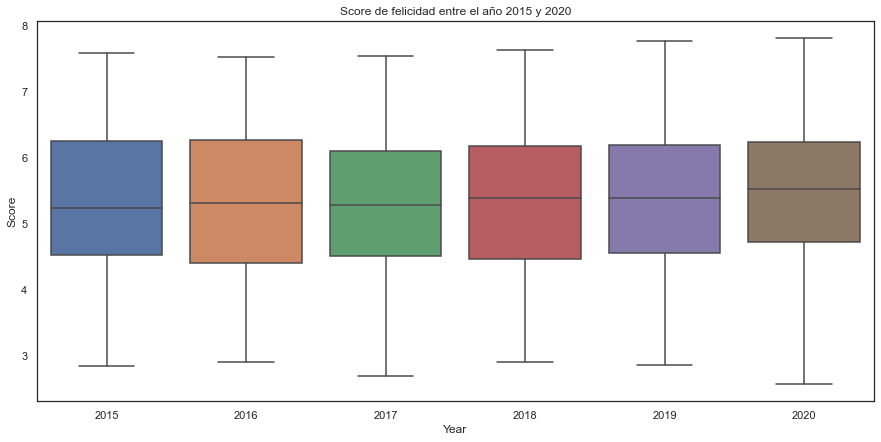

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Year', y="Score", data=DF_scores)
plt.title('Score de felicidad entre el año 2015 y 2020')

In [30]:
#WordCloud de los paises con mayor score
from wordcloud import WordCloud, STOPWORDS
countries=str(df15['Country'])

country_wc = WordCloud(
    background_color='white',
    max_words=2000)
# generate the word cloud
country_wc.generate(countries)

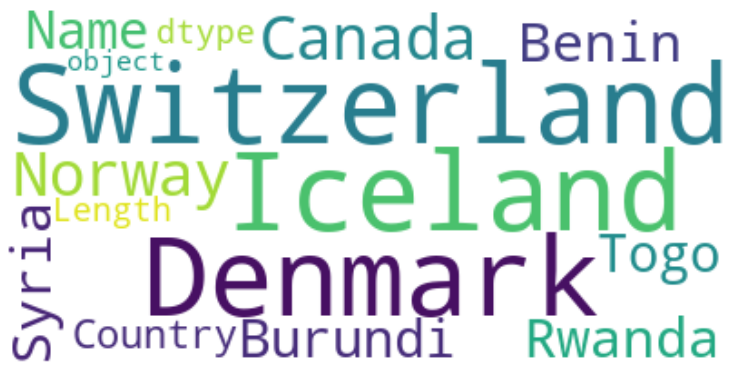

In [31]:
plt.imshow(country_wc, interpolation='bilinear')
plt.axis('off')
plt.show()